In [ ]:
import cv2
import numpy as np


frozen_model = '/content/frozen_inference_graph.pb'
config_file = '/content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

model = cv2.dnn_DetectionModel(frozen_model, config_file)

model.setInputSize(320, 320)
model.setInputScale(1.0/127.5) # 255 / 2 = 127.5
model.setInputMean((127.5, 127.5, 127.5)) # mobilenet => [-1, 1]
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7fb1127e4db0>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
classlabels = []
file_name = '/content/labels.txt'
with open(file_name, 'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

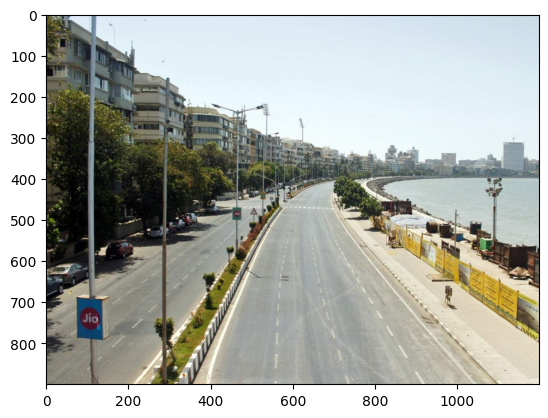

In [ ]:
import matplotlib.pyplot as plt

img = cv2.imread('/content/clean_1.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [ ]:
print(confidence)

[0.6749161  0.673597   0.62694067 0.5791266  0.5651932  0.54518974
 0.5165875  0.5099387 ]


In [ ]:
print(bbox) # x, y, w, h

[[ 309  500   42   33]
 [   0  619   62   58]
 [ 245  503   61   42]
 [ 371  471   35   21]
 [  38  591   66   51]
 [ 151  542   64   51]
 [ 136  551   70   51]
 [1038  535   34   46]]


In [ ]:
print(ClassIndex)

[3 3 3 3 3 3 3 1]


In [ ]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

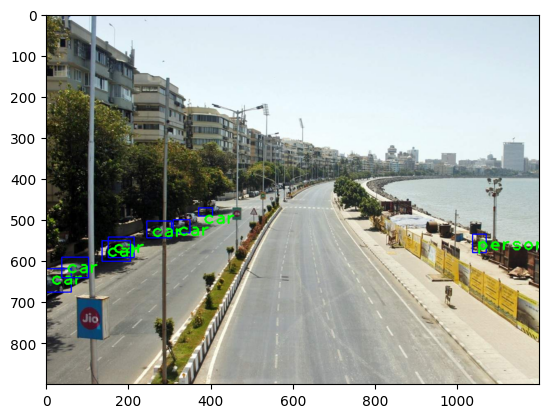

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imsave('pred.jpg', img)


In [ ]:

true_image = cv2.imread('clean_1.jpg', cv2.IMREAD_GRAYSCALE)
predicted_image = cv2.imread('pred.jpg', cv2.IMREAD_GRAYSCALE)

true_mask = cv2.threshold(true_image, 128, 255, cv2.THRESH_BINARY)[1]
predicted_mask = cv2.threshold(predicted_image, 128, 255, cv2.THRESH_BINARY)[1]


intersection = np.logical_and(true_mask, predicted_mask)
union = np.logical_or(true_mask, predicted_mask)
jaccard = np.sum(intersection) / np.sum(union)

print('Jaccard Index:', jaccard)


Jaccard Index: 0.9768592144298701
